In [16]:
import networkx as nx
import random as rd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import math
import pandas as pd

In [17]:
### Load data

File_Names=[['a3_b3_g2.1_e2_0.1_1', 'a3_b3_g2.1_e2_0.1_2', 'a3_b3_g2.1_e2_0.1_3', 'a3_b3_g2.1_e2_0.1_4', 'a3_b3_g2.1_e2_0.1_5'], ['a3_b3_g2.1_e2_0.2_1', 'a3_b3_g2.1_e2_0.2_2', 'a3_b3_g2.1_e2_0.2_3', 'a3_b3_g2.1_e2_0.2_4', 'a3_b3_g2.1_e2_0.2_5'], ['a3_b3_g2.1_e2_0.4_1', 'a3_b3_g2.1_e2_0.4_2', 'a3_b3_g2.1_e2_0.4_3', 'a3_b3_g2.1_e2_0.4_4', 'a3_b3_g2.1_e2_0.4_5'], ['a3_b3_g2.1_e2_0.7_1', 'a3_b3_g2.1_e2_0.7_2', 'a3_b3_g2.1_e2_0.7_3', 'a3_b3_g2.1_e2_0.7_4', 'a3_b3_g2.1_e2_0.7_5'], ['a3_b3_g2.1_e2_1.0_1', 'a3_b3_g2.1_e2_1.0_2', 'a3_b3_g2.1_e2_1.0_3', 'a3_b3_g2.1_e2_1.0_4', 'a3_b3_g2.1_e2_1.0_5']]
g = globals()

for i in range(5):
    for j in range(5):
        g[f"data{5*i+j+1}"] = np.loadtxt(f'D:\Daten mit Änderungen\Physik\Bachelorarbeit\Generated_Data\{File_Names[i][j]}.csv', delimiter=',')

In [18]:
### Split data in two opinions per Dataset, exclude activity
N = 1000


for i in range(25):
    for j in range(2):
        g[f"data_{i+1}_op_{j+1}"] = []
        for k in range (N):
            g[f"data_{i+1}_op_{j+1}"].append( g[f"data{i+1}"][2*k + 1 + j] )

### Determine variances and weigh them over 5 iterations

for i in range(25):
    for j in range(2):
        g[f"var_{i+1}_{j+1}"] = np.var( g[f"data_{i+1}_op_{j+1}"], axis=1)


for i in range(5):
    for j in range(2):
        g[f"var_weigh_{i+1}_{j+1}"] = np.zeros(N)
        for k in range (N):
            g[f"var_weigh_{i+1}_{j+1}"][k] += (g[f"var_{5*i+1}_{j+1}"][k] + g[f"var_{5*i+2}_{j+1}"][k] + g[f"var_{5*i+3}_{j+1}"][k] + g[f"var_{5*i+4}_{j+1}"][k] + g[f"var_{5*i+5}_{j+1}"][k]) / 5


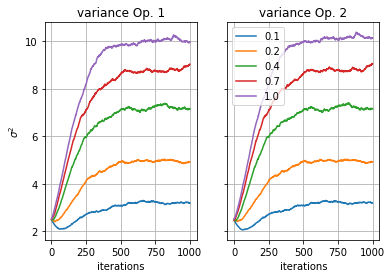

In [19]:
### Create Plot

iterations = np.arange(1,N+1)

fig, ax = plt.subplots(1, 2, sharey=True)
eps2 = [0.1, 0.2, 0.4, 0.7, 1.0]

ax[0].set_title("variance Op. 1")
for i in range (5):
    ax[0].plot(iterations, g[f"var_weigh_{i+1}_1"], label=f"{eps2[i]}")
ax[0].set_xlabel("iterations")
ax[0].set_ylabel(f"$\sigma^2$")
ax[0].grid()
ax[1].set_title("variance Op. 2")
for i in range (5):
    ax[1].plot(iterations, g[f"var_weigh_{i+1}_2"], label=f"{eps2[i]}")
ax[1].set_xlabel("iterations")
ax[1].grid()
ax[1].legend()
plt.show()

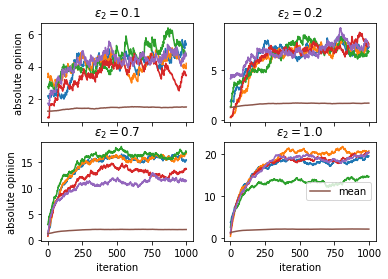

In [20]:
#### Plotting absolute opinions of most active nodes for opinion 1

# Finding 4 most active nodes for 4 datasets

act = []
iterations = np.arange(1,N)
num_act = 5

# Number of datasets to be examined
dat = [1, 6, 16, 21]

# Save most active nodes in each dataset in act and create datasets of absolute values of opinion one (again excluding the activities in the dataset)

for i in dat:
    act.append( np.argpartition(g[f"data{i}"][0], -num_act)[-num_act:])
    g[f"data{i}_abs"] = np.abs(g[f"data_{i}_op_1"][1:])

for i in dat:
    g[f"means{i}"] = np.mean(g[f"data{i}_abs"], axis = 1)


#print(data1_abs[:,act[0][0]])
# Create subplots

fig, ax = plt.subplots(2, 2, sharex=True, sharey=False)

ax[0][0].set_ylabel("absolute opinion")
ax[1][0].set_ylabel("absolute opinion")
ax[1][0].set_xlabel("iteration")
ax[1][1].set_xlabel("iteration")

ax[0][0].set_title(f"$\epsilon_2 = 0.1$")
ax[0][1].set_title(f"$\epsilon_2 = 0.2$")
ax[1][0].set_title(f"$\epsilon_2 = 0.7$")
ax[1][1].set_title(f"$\epsilon_2 = 1.0$")

for i in range (num_act):
    ax[0][0].plot(iterations, g[f"data{dat[0]}_abs"][:,act[0][i]])
ax[0][0].plot(iterations, means1)

for i in range (num_act):
    ax[0][1].plot(iterations, g[f"data{dat[1]}_abs"][:,act[1][i]])
ax[0][1].plot(iterations, means6) 

for i in range (num_act):
    ax[1][0].plot(iterations, g[f"data{dat[2]}_abs"][:,act[2][i]])
ax[1][0].plot(iterations, means16)  

for i in range (num_act):
    ax[1][1].plot(iterations, g[f"data{dat[3]}_abs"][:,act[3][i]])
ax[1][1].plot(iterations, means21, label="mean")
ax[1][1].legend(loc = 7)  

plt.show()


